In [ ]:
pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7d7fbf10c4f91380bf64db41af45c83455eaa57efb20852307ccc5482539c4f8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

In [3]:
from google.colab import files

# Upload your CSV file
uploaded = files.upload()


Saving red_wine.csv to red_wine (1).csv


In [5]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load the dataset
df = pd.read_csv("red_wine.csv")

profile = ProfileReport(df, explorative=True)

profile.to_file("red_wine_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 55.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from google.colab import files


files.download("red_wine_report.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

# Load the red-wine dataset
df = pd.read_csv('red_wine.csv')

# Check the column names to ensure 'quality' is present
print("Column Names:", df.columns)

# Clean up any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Features and target (Assuming 'type' is the target column)
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target

# Check if 'type' is the correct target column
if 'type' not in df.columns:
    raise KeyError("'type' column not found in the dataset. Please check the column names.")

# Baseline model
# Baseline accuracy: Accuracy of the majority class
baseline_accuracy = y.value_counts().max() / len(y)

# Baseline AUC: AUC for random classifier (expected value = 0.5)
baseline_auc = 0.5

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM - Linear': SVC(kernel='linear', probability=True),
    'SVM - RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation results storage
results = {}

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    # Accuracy and AUC using cross-validation
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    results[name] = {'Accuracy': accuracy, 'AUC': auc}

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the performance metrics for each model
print("Model Performance (Accuracy & AUC):")
print(results_df)

# Compare the results to


Column Names: Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')
Model Performance (Accuracy & AUC):
                     Accuracy       AUC
Logistic Regression  0.784785  0.879902
Naive Bayes          0.821627  0.895408
Decision Tree        0.748004  0.750009
SVM - Linear         0.791863  0.881489
SVM - RBF            0.535844  0.868920
Random Forest        0.802359  0.900029


In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

# Load the red-wine dataset
df = pd.read_csv('red_wine.csv')

# Check the column names to ensure 'quality' is present
print("Column Names:", df.columns)

# Clean up any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Features and target (Assuming 'quality' is the target column)
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target

# Check if 'quality' is the correct target column
if 'type' not in df.columns:
    raise KeyError("'quality' column not found in the dataset. Please check the column names.")

# Baseline model
# Baseline accuracy: Accuracy of the majority class
baseline_accuracy = y.value_counts().max() / len(y)

# Baseline AUC: AUC for random classifier (expected value = 0.5)
baseline_auc = 0.5

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM - Linear': SVC(kernel='linear', probability=True),
    'SVM - RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Cross-validation results storage
results = {}

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    # Accuracy and AUC using cross-validation
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    results[name] = {'Accuracy': accuracy, 'AUC': auc}

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the performance metrics for each model
print("Model Performance (Accuracy & AUC):")
print(results_df)

# Display Baseline Accuracy and AUC for comparison
print("\nBaseline Accuracy (Majority Class Accuracy):", baseline_accuracy)
print("Baseline AUC (Random Classifier AUC):", baseline_auc)



Column Names: Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')
Model Performance (Accuracy & AUC):
                     Accuracy       AUC
Logistic Regression  0.784785  0.879902
Naive Bayes          0.821627  0.895408
Decision Tree        0.753267  0.745297
SVM - Linear         0.791863  0.881489
SVM - RBF            0.535844  0.868920
Random Forest        0.800605  0.893995

Baseline Accuracy (Majority Class Accuracy): 0.5288966725043783
Baseline AUC (Random Classifier AUC): 0.5


In [22]:
pip install matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification


In [3]:
# Generating a synthetic dataset (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Get the predicted probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]


In [6]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


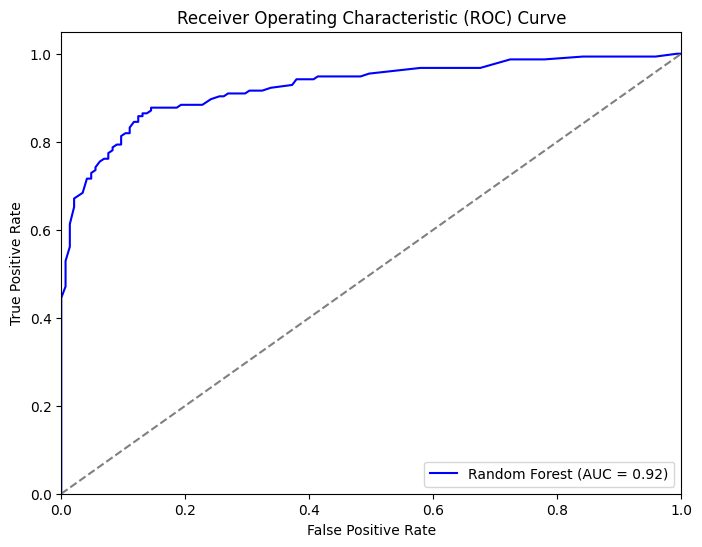

In [7]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [9]:
from google.colab import files
uploaded = files.upload()

# Load the white wine dataset (replace 'winequality-white.csv' with your actual file name)
df = pd.read_csv('white_wine.csv')


Saving white_wine.csv to white_wine (1).csv


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('white_wine.csv')

# Preprocess the data
X = data.drop('type', axis=1)
y = data['type']
X = X.fillna(X.mean())  # Example of filling missing values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

naive_bayes.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_pred_nb = naive_bayes.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate AUC scores
auc_nb = roc_auc_score(y_test, y_pred_nb)
auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"AUC for Naive Bayes: {auc_nb}")
print(f"AUC for Random Forest: {auc_rf}")


AUC for Naive Bayes: 0.9351851851851851
AUC for Random Forest: 0.888888888888889
